In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(tf.__version__)

2.16.1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile


IMAGE_SIZE = [150, 150]

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                    rotation_range = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    shear_range = 0.1,
                                    zoom_range = 0.1,
                                    horizontal_flip = True
                                   
                                   )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory('processed_images/train',
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( 'processed_images/test',
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150),
                                                          shuffle = False 
                                                    )



Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Reshape, LSTM, GRU, Bidirectional
from tensorflow.keras.layers import TimeDistributed, GlobalAveragePooling2D, Input
from tensorflow.keras import regularizers
import tensorflow as tf


#CNN-RNN model with Functional API - more flexible
def create_cnn_rnn_model_functional():
    # Input layer
    inputs = Input(shape=(150, 150, 3))
    
    # CNN layers
    x = Conv2D(64, (3, 3), activation='relu')(inputs)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.35)(x)
    
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.35)(x)
    
    # Get the spatial dimensions
    _, h, w, c = x.shape
    
    # Reshape spatial dimensions into a sequence
    # Treat each row of the feature map as a time step
    x = Reshape((h, w * c))(x)
    
    # RNN layers
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(64))(x)
    x = Dropout(0.3)(x)
    
    # Dense layers
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    
    # Output layer
    outputs = Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [7]:

model = create_cnn_rnn_model_functional()
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 15, 480)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 256)        │       623,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 953,794 (3.64 MB)

 Trainable params: 953,474 (3.64 MB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
import time
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


start = time.time()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
)

end = time.time()
elapsed = end - start
print("Total Time:", elapsed)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 942ms/step - accuracy: 0.9842 - loss: 0.0725 - val_accuracy: 0.5950 - val_loss: 2.3034
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 643ms/step - accuracy: 0.9546 - loss: 0.1472 - val_accuracy: 0.6777 - val_loss: 1.5485
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 756ms/step - accuracy: 0.9664 - loss: 0.0935 - val_accuracy: 0.8347 - val_loss: 0.5734
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 843ms/step - accuracy: 0.9665 - loss: 0.1144 - val_accuracy: 0.9008 - val_loss: 0.3124
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 714ms/step - accuracy: 0.9566 - loss: 0.1236 - val_accuracy: 0.8430 - val_loss: 0.4686
Total Time: 97.79941153526306


In [24]:
loss, accuracy = model.evaluate(validation_generator)
print("Accuracy score:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step - accuracy: 0.7778 - loss: 0.5946
Accuracy score: 0.8429751992225647


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(validation_generator)  
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

target_names = ['Normal', 'Pneumonia']
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 692ms/step
Confusion Matrix
[[44 17]
 [ 2 58]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.96      0.72      0.82        61
   Pneumonia       0.77      0.97      0.86        60

    accuracy                           0.84       121
   macro avg       0.86      0.84      0.84       121
weighted avg       0.87      0.84      0.84       121



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


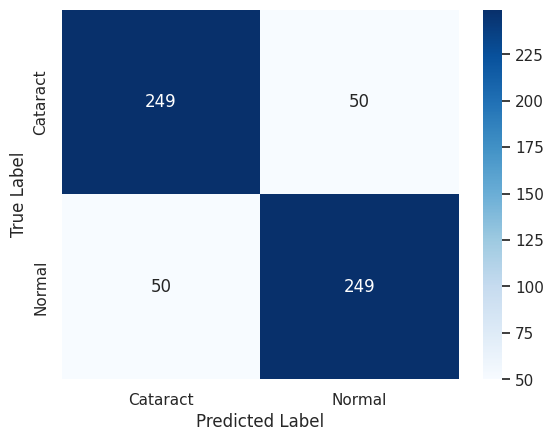

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

num_samples = 10
true_labels = []
predictions = []

for i, (x, y) in enumerate(validation_generator):
    if i >= num_samples:
        break
    true_labels.extend(y)
    predictions.extend(model.predict(x))

true_labels = np.concatenate(true_labels)
predictions = np.concatenate(predictions)
binary_predictions = np.round(predictions)

conf_mat = confusion_matrix(true_labels, binary_predictions)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cataract', 'Normal'], yticklabels=['Cataract', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
model.save('rnn_cnn1_model.h5')

In [5]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('rnn_cnn1_model.h5')

In [6]:
loss, accuracy = model.evaluate(validation_generator)
print("Accuracy score:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.7778 - loss: 0.5946
Accuracy score: 0.8429751992225647
